In [1]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import pandas
import matplotlib.pyplot as plt

boston_data = load_boston()
# target

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


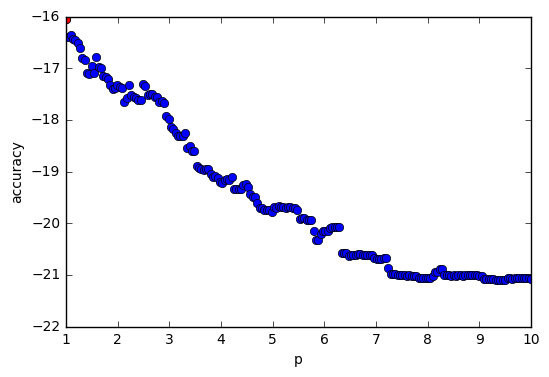

In [23]:
data = boston_data.data
data = scale(data)
target = boston_data.target

kf = KFold(len(data), n_folds=5, shuffle=True, random_state=42)

accuracy_scaled = []  
for p_koef in np.linspace(1, 10, num=200):
    neigh = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=p_koef)
    a = cross_val_score(estimator=neigh, X=data, y=target, cv=kf, scoring='neg_mean_squared_error')
    accuracy_scaled.append(np.mean(a))

x = np.linspace(1, 10, num=200)
plt.plot(x, accuracy_scaled, 'bo')
plt.plot(np.argmax(accuracy_scaled) + 1, np.amax(accuracy_scaled), 'ro')
plt.ylabel('accuracy')
plt.xlabel('p')
# plt.axis([0, 51, 0, 1])
plt.show()

In [21]:
neigh = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=1)
neigh.fit(X=data[150:], y=target[150:])
print neigh.predict(data[3])
print target

[ 33.09891707]
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50. 

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
